In [26]:
############################################################
## Title  : 'Comparison of multiple distributions'        ##
## Author : 'Sathish Kabatkar Ravindranth'                ##
## Date   : '08th December, 2022'                         ##
## Output : pdf document                                  ##
## Group  : 8                                             ##
############################################################

In [2]:
library("ggplot2")
library("ggpubr")
library("dplyr")
library("rstatix")

Warning message:
“Paket ‘ggplot2’ wurde unter R Version 4.1.1 erstellt”
Warning message:
“Paket ‘dplyr’ wurde unter R Version 4.1.1 erstellt”

Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘rstatix’


Das folgende Objekt ist maskiert ‘package:stats’:

    filter




In [3]:
#Loading the Input data
input_data <- read.csv('SwimmingTimes.csv')

In [4]:
#Some participants in more than one category
input_data[input_data$Name %in% input_data[duplicated(input_data$Name),]$Name,]

,Category,Name,Time
,<chr>,<chr>,<dbl>
2,Backstroke,AnastasyaGorbenko,131.46
5,Backstroke,KatieShanahan,129.82
19,Breaststroke,KristynaHorska,145.55
24,Breaststroke,LauraLahtinen,147.60
33,Butterfly,MireiaBelmonteGarcia,134.01
34,Butterfly,KatinkaHosszu,134.54
42,Butterfly,LauraLahtinen,131.41
51,Freestyle,MarritSteenbergen,117.40
67,Medley,KatieShanahan,131.84


In [5]:
#Total observations in the data
count(input_data)

n
<int>
80


In [6]:
#Removing observations of participant's in their second category of competition
input_data  <- input_data  %>% filter(!(Name == "AnastasyaGorbenko" & Category == "Backstroke"))
input_data  <- input_data  %>% filter(!(Name == "KatieShanahan" & Category == "Backstroke"))
input_data  <- input_data  %>% filter(!(Name == "KristynaHorska" & Category == "Breaststroke"))
input_data  <- input_data  %>% filter(!(Name == "LauraLahtinen" & Category == "Butterfly"))
input_data  <- input_data  %>% filter(!(Name == "MireiaBelmonteGarcia" & Category == "Butterfly"))
input_data  <- input_data  %>% filter(!(Name == "KatinkaHosszu" & Category == "Butterfly"))
input_data  <- input_data  %>% filter(!(Name == "MarritSteenbergen" & Category == "Freestyle"))

In [7]:
#View the input data
head(input_data)

,Category,Name,Time
,<chr>,<chr>,<dbl>
1,Backstroke,SonneleOeztuerk,133.97
2,Backstroke,CamilaRodriguesRebelo,131.05
3,Backstroke,DoraMolnar,129.88
4,Backstroke,CarmenWeilerSastre,131.78
5,Backstroke,LenaGrabowski,130.78
6,Backstroke,EmmaTerebo,131.16


In [8]:
#Viewing the number of categories given in data
unique(input_data$Category)

[1] "Backstroke"   "Breaststroke" "Butterfly"    "Freestyle"    "Medley"

In [9]:
#Ordering the data based on the categories
input_data = input_data[order(input_data$Category),]

In [10]:
#Mean value for rental price per square meter in overall
summary(input_data$Time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  117.7   129.2   132.5   132.6   135.7   148.4 

In [11]:
#Standard deviation
round(sd(input_data$Time),3)

[1] 8.966

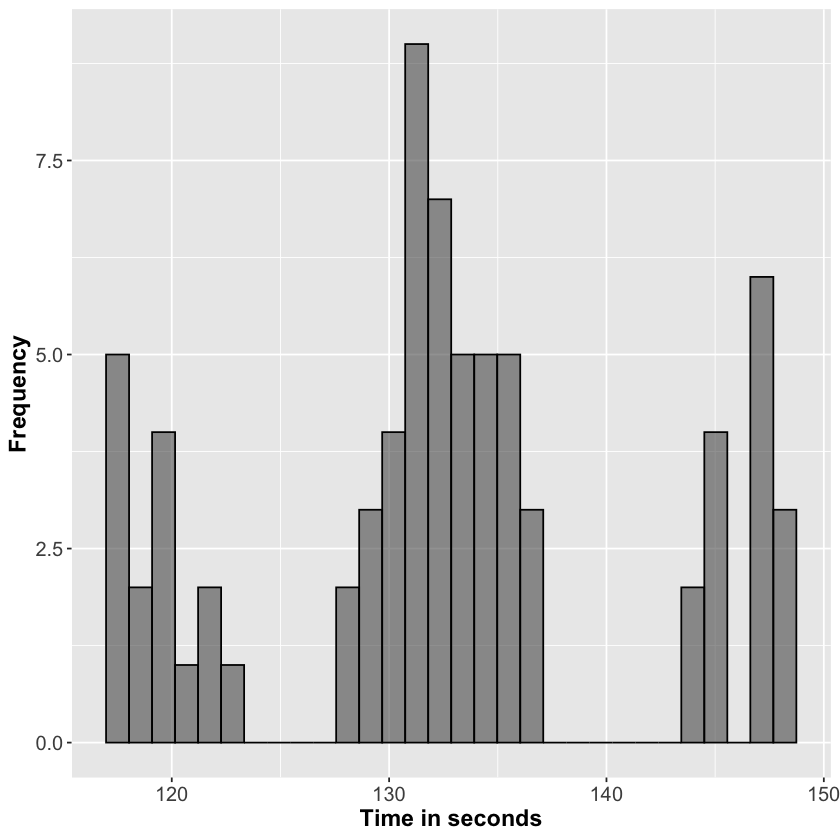

In [12]:
#Histogram to see the frequency distribution of the variable time 
ggplot(input_data, aes(x=Time))+ 
  geom_histogram(color="black",bins=30, alpha = 0.6)+
  xlab("Time in seconds") + ylab("Frequency") +
  theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

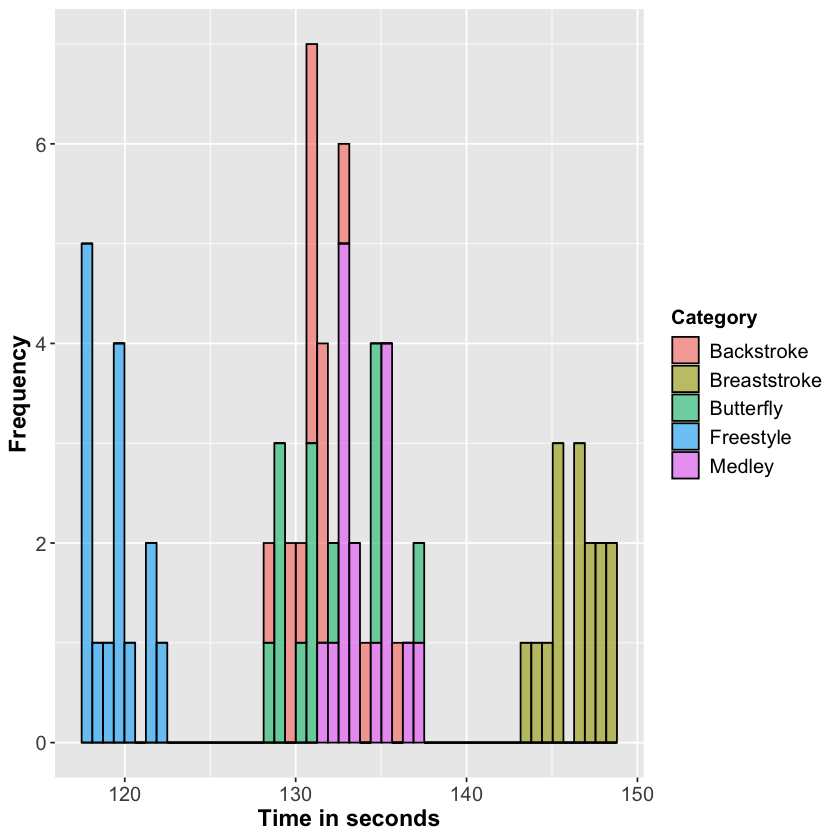

In [13]:
#Histogram to see the frequency distribution of the variable time in five categories 
ggplot(input_data, aes(x=Time, fill=Category))+ 
      geom_histogram(color="black",bins=50, alpha = 0.6)+
      xlab("Time in seconds") + 
      ylab("Frequency") + 
      theme(axis.text=element_text(size=12),
            axis.title=element_text(size=14, face = "bold"), 
            legend.text = element_text(size = 12),
            legend.title = element_text(size = 12, face = "bold"))

In [14]:
#Table that lists the various statistical measures calculated on the variable time
Analysistable <- group_by(input_data, Category) %>%
                            summarise(median = sprintf("%0.3f", median(Time, na.rm = TRUE)),
                                    mean = sprintf("%0.3f", mean(Time, na.rm = TRUE)),
                                    sd = sd(Time, na.rm = TRUE),
                                    variance = var(Time, na.rm = TRUE),
                                    minimum = min(Time, na.rm = TRUE),
                                    maximum = max(Time, na.rm = TRUE),
                                    IQR = quantile(Time, 3/4) - quantile(Time, 1/4))
Analysistable

Category,median,mean,sd,variance,minimum,maximum,IQR
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Backstroke,131.115,131.380,1.851145,3.426738,128.18,135.74,1.5175
Breaststroke,146.680,146.400,1.490676,2.222114,143.73,148.40,2.1050
Butterfly,130.820,131.675,2.717344,7.383960,128.48,136.92,5.1000
Freestyle,119.500,119.358,1.558782,2.429803,117.70,122.42,2.2350
Medley,133.455,134.040,1.588752,2.524133,131.84,137.02,2.4750


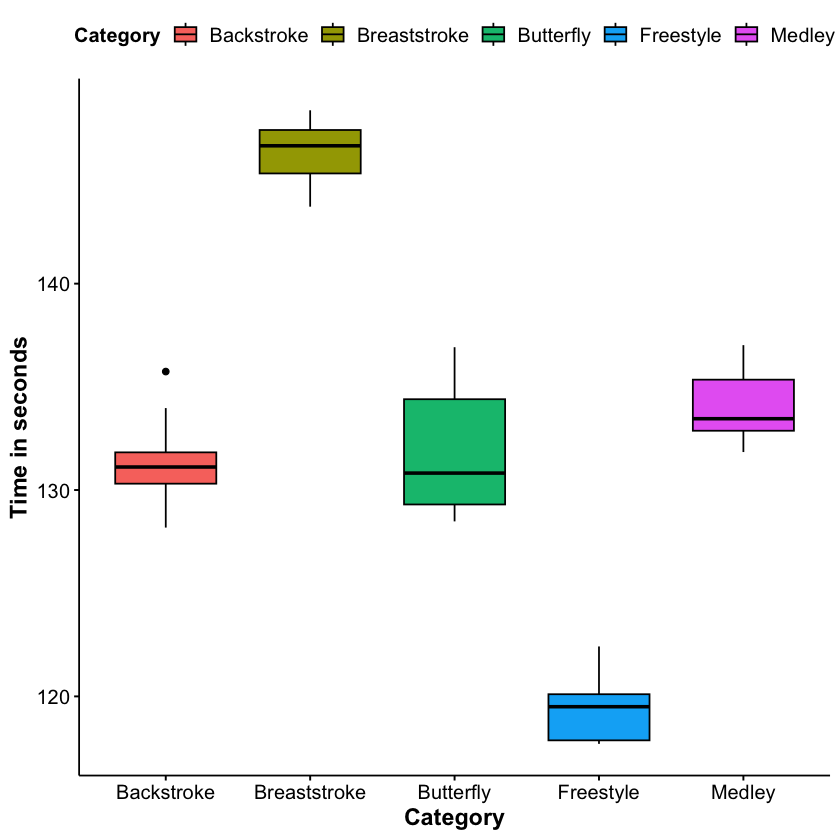

In [15]:
#Box plot to compare the finishing time in the different categories to find the homogeneity in variance
ggboxplot(input_data, x = "Category", y = "Time", 
          color = "black", 
          fill = "Category",
          ylab = "Time in seconds", 
          xlab = "Category") +
          theme(axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.title = element_text(size = 12, face = "bold"),
                legend.text = element_text(size = 12))

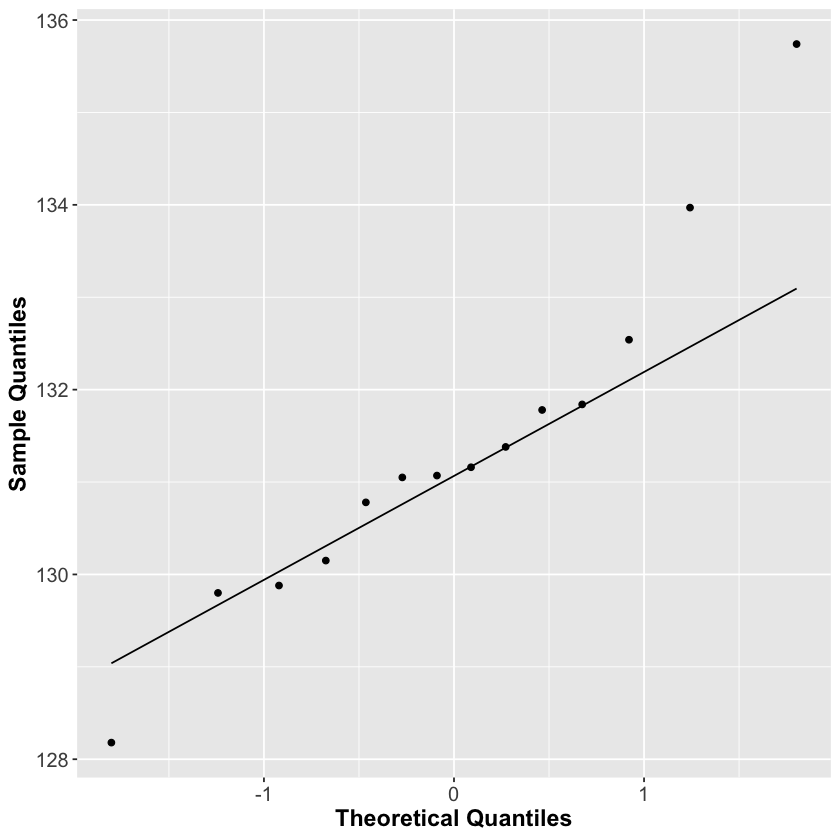

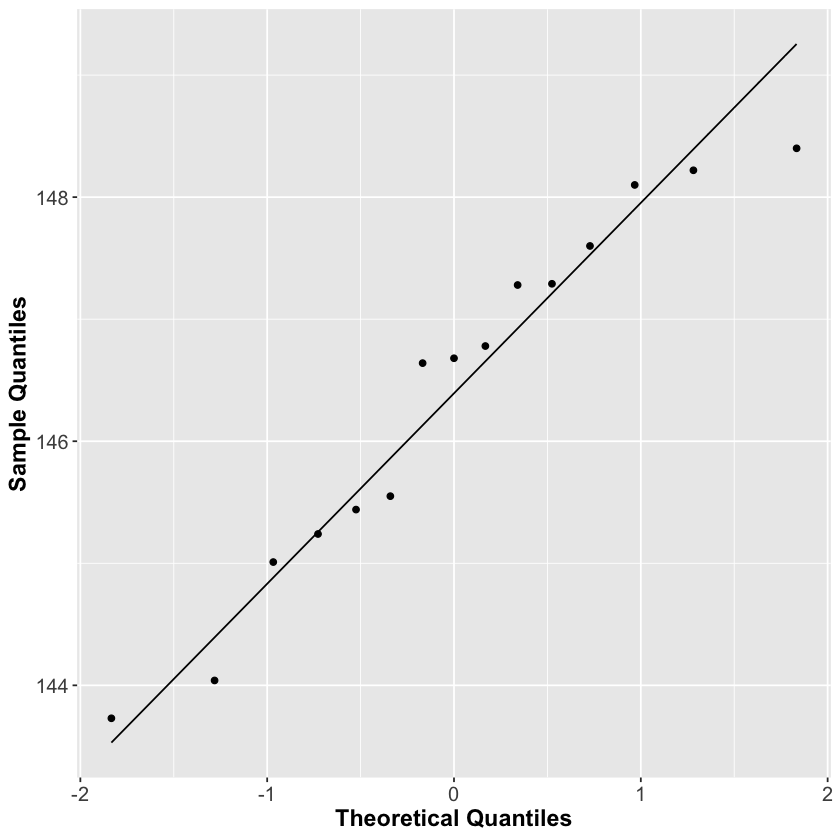

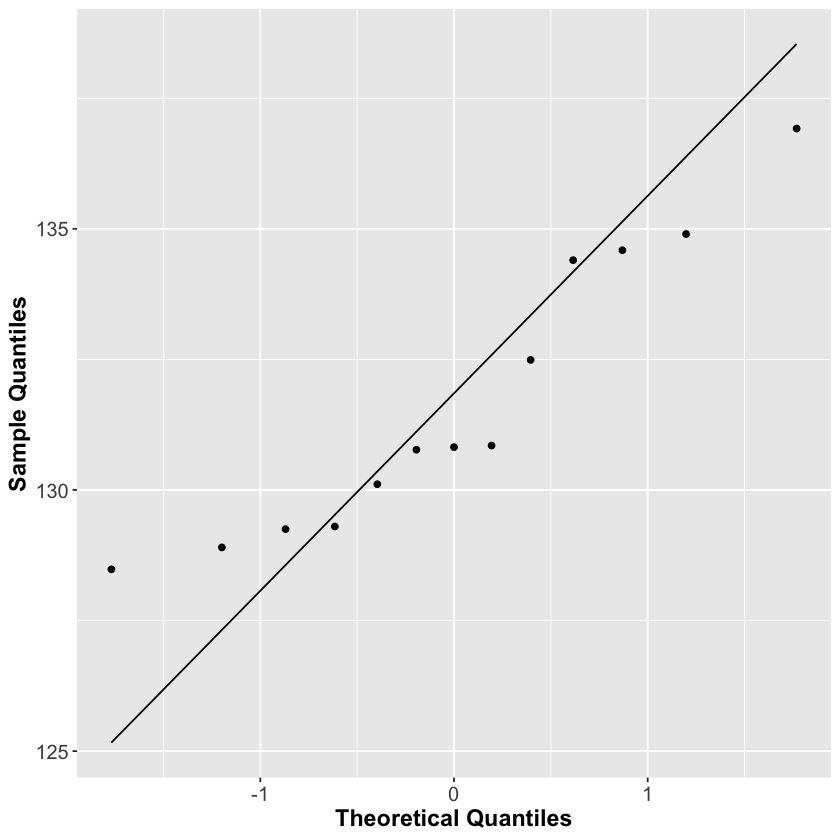

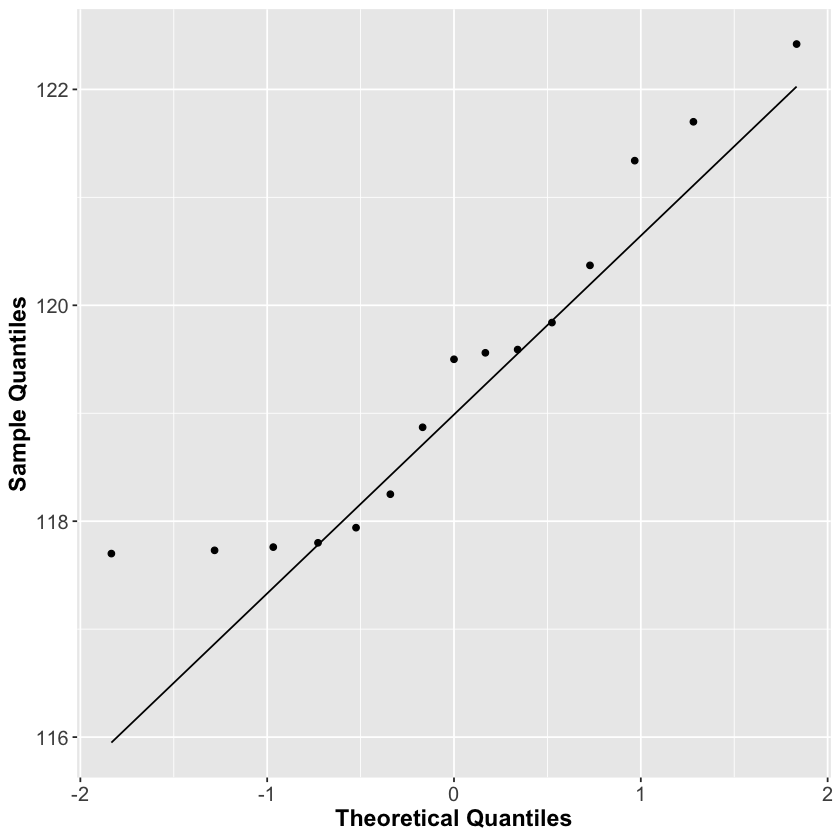

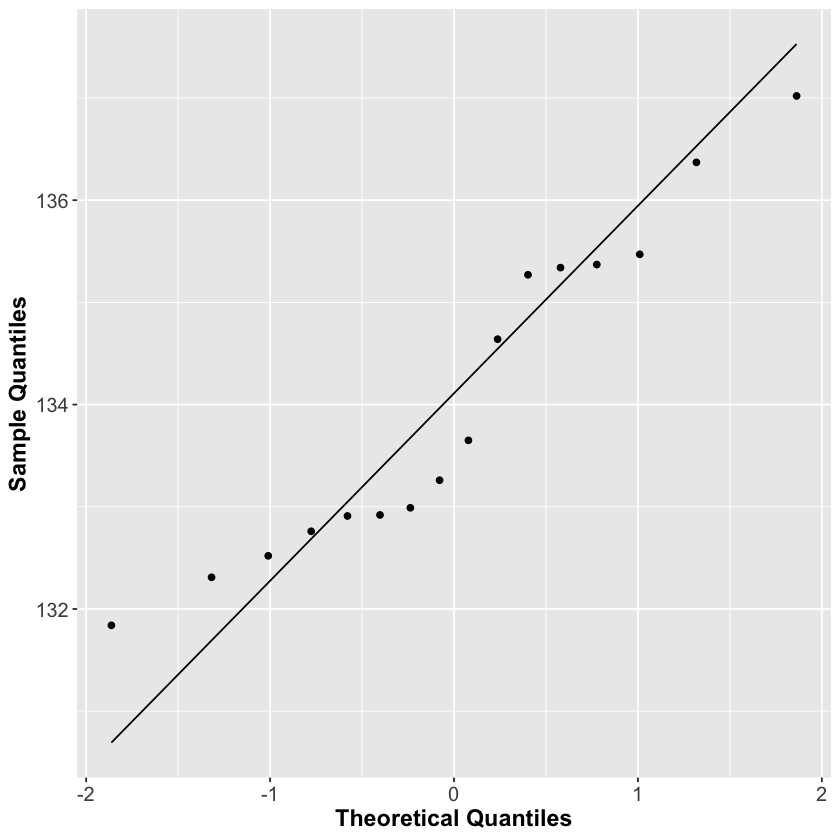

In [16]:
##Q-Q plots to see normality of each category
ggplot(input_data[input_data$Category == "Backstroke",], aes(sample = Time)) +
       stat_qq(distribution = stats::qnorm) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

ggplot(input_data[input_data$Category == "Breaststroke",], aes(sample = Time)) +
       stat_qq(distribution = stats::qnorm) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

ggplot(input_data[input_data$Category == "Butterfly",], aes(sample = Time)) +
       stat_qq(distribution = stats::qnorm) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

ggplot(input_data[input_data$Category == "Freestyle",], aes(sample = Time)) +
       stat_qq(distribution = stats::qnorm) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

ggplot(input_data[input_data$Category == "Medley",], aes(sample = Time)) +
       stat_qq(distribution = stats::qnorm) +
       stat_qq_line() + 
       xlab("Theoretical Quantiles") + 
       ylab("Sample Quantiles") + 
          theme(plot.title = element_text(face = "bold",hjust = 0.5, size = 12), 
                axis.text=element_text(size=12),
                axis.title=element_text(size=14, face = "bold"), 
                legend.text = element_text(size = 12))

In [17]:
# One-way ANOVA test for a global test
one_way_anova <- aov(Time ~ Category, data = input_data)
summary(one_way_anova)

            Df Sum Sq Mean Sq F value Pr(>F)    
Category     4   5552  1388.0   399.7 <2e-16 ***
Residuals   68    236     3.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [18]:
#List of pairs made of the 5 Categories
pair_category  <- c("Backstroke_Breaststroke",
                    "Backstroke_Butterfly",
                    "Backstroke_Freestyle",
                    "Backstroke_Medley",
                   "Breaststroke_Butterfly",
                    "Breaststroke_Freestyle",
                    "Breaststroke_Medley",
                    "Butterfly_Freestyle",
                   "Butterfly_Medley",
                    "Freestyle_Medley")

In [19]:
#Filtering data for pairwise two sample t-test
Backstroke_Breaststroke  <- input_data  %>% filter(Category %in% c("Backstroke","Breaststroke")) 
Backstroke_Butterfly     <- input_data  %>% filter(Category %in% c("Backstroke","Butterfly"))  
Backstroke_Freestyle     <- input_data  %>% filter(Category %in% c("Backstroke","Freestyle"))  
Backstroke_Medley        <- input_data  %>% filter(Category %in% c("Backstroke","Medley")) 
Breaststroke_Butterfly   <- input_data  %>% filter(Category %in% c("Breaststroke","Butterfly"))  
Breaststroke_Freestyle   <- input_data  %>% filter(Category %in% c("Breaststroke","Freestyle"))  
Breaststroke_Medley      <- input_data  %>% filter(Category %in% c("Breaststroke","Medley"))  
Butterfly_Freestyle      <- input_data  %>% filter(Category %in% c("Butterfly","Freestyle"))  
Butterfly_Medley         <- input_data  %>% filter(Category %in% c("Butterfly","Medley"))  
Freestyle_Medley         <- input_data  %>% filter(Category %in% c("Freestyle","Medley"))  

In [20]:
#t-tests
test_1  <- t.test(Time ~ Category, data = Backstroke_Breaststroke, var.equal = TRUE)
test_2  <- t.test(Time ~ Category, data = Backstroke_Butterfly, var.equal = TRUE)
test_3  <- t.test(Time ~ Category, data = Backstroke_Freestyle, var.equal = TRUE)
test_4  <- t.test(Time ~ Category, data = Backstroke_Medley, var.equal = TRUE)
test_5  <- t.test(Time ~ Category, data = Breaststroke_Butterfly, var.equal = TRUE)
test_6  <- t.test(Time ~ Category, data = Breaststroke_Freestyle, var.equal = TRUE)
test_7  <- t.test(Time ~ Category, data = Breaststroke_Medley, var.equal = TRUE)
test_8  <- t.test(Time ~ Category, data = Butterfly_Freestyle, var.equal = TRUE)
test_9  <- t.test(Time ~ Category, data = Butterfly_Medley, var.equal = TRUE)
test_10 <- t.test(Time ~ Category, data = Freestyle_Medley, var.equal = TRUE)

In [21]:
#p-values from the t-tests
p_values  <- c(test_1$p.value,test_2$p.value,test_3$p.value,test_4$p.value,test_5$p.value,
              test_6$p.value,test_7$p.value,test_8$p.value,test_9$p.value,test_10$p.value)

In [22]:
#Adjusting methods, Bonferroni, Benjamini and hochberg
p_values_bonferroni  <- p.adjust(p = p_values, method = "bonferroni", n = 10)
p_values_holm  <- p.adjust(p = p_values, method = "holm", n = 10)

In [23]:
#Tabulating the P-value
df1 <- data.frame(data.frame(pair_category),data.frame(p_values))
names(df1)[1] <- "Categories pair"
names(df1)[2] <- "p-values"

df1["Rejected"] <- with(df1, ifelse(df1$`p-values` < 0.05, "Yes", "No"))

#Tabulating the P-value before and after bonferroni adjust method
df2 <- data.frame(data.frame(pair_category),data.frame(p_values_bonferroni))
names(df2)[1] <- "Categories pair"
names(df2)[2] <- "Bon p-values"

df2["B_Rejected"] <- with(df2, ifelse(df2$`Bon p-values` < 0.05, "Yes", "No"))

#Tabulating the P-value before and after bonferroni adjust method
df3 <- data.frame(data.frame(pair_category),data.frame(p_values_holm))
names(df3)[1] <- "Categories pair"
names(df3)[2] <- "Hol p-values"

df3["H_Rejected"] <- with(df3, ifelse(df3$`Hol p-values` < 0.05, "Yes", "No"))


In [24]:
#Test results without correcting multiple testing problem
df1

Categories pair,p-values,Rejected
<chr>,<dbl>,<chr>
Backstroke_Breaststroke,8.180062e-20,Yes
Backstroke_Butterfly,7.424315e-01,No
Backstroke_Freestyle,3.900106e-17,Yes
Backstroke_Medley,2.220449e-04,Yes
Breaststroke_Butterfly,2.913045e-16,Yes
Breaststroke_Freestyle,1.411879e-28,Yes
Breaststroke_Medley,8.422435e-20,Yes
Butterfly_Freestyle,2.710592e-14,Yes
Butterfly_Medley,6.882146e-03,Yes


In [25]:
# Adjusted p-values 
final_result  <- merge(df2,df3,by = "Categories pair")
final_result

Categories pair,Bon p-values,B_Rejected,Hol p-values,H_Rejected
<chr>,<dbl>,<chr>,<dbl>,<chr>
Backstroke_Breaststroke,8.180062e-19,Yes,6.544050e-19,Yes
Backstroke_Butterfly,1.000000e+00,No,7.424315e-01,No
Backstroke_Freestyle,3.900106e-16,Yes,2.340064e-16,Yes
Backstroke_Medley,2.220449e-03,Yes,6.661346e-04,Yes
Breaststroke_Butterfly,2.913045e-15,Yes,1.456523e-15,Yes
Breaststroke_Freestyle,1.411879e-27,Yes,1.411879e-27,Yes
Breaststroke_Medley,8.422435e-19,Yes,6.544050e-19,Yes
Butterfly_Freestyle,2.710592e-13,Yes,1.084237e-13,Yes
Butterfly_Medley,6.882146e-02,No,1.376429e-02,Yes
